<a href="https://colab.research.google.com/github/applejxd/colaboratory/blob/master/physics/variation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 変分原理のデモ

調和振動子の作用（汎関数）
\begin{equation}
    S[q]
    =\int dt \left(\frac{1}{2}m\dot{q}(t)^2-\frac{1}{2}kq(t)^2\right)
\end{equation}
に対する変分原理を最適化問題として解く。

len(t_list)=1000, dt = 0.01


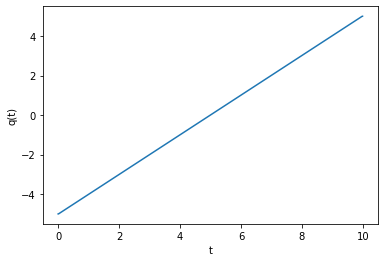

In [32]:
import numpy as np
import matplotlib.pyplot as plt

t_list = np.arange(0, 10, 0.01)
dt = t_list[1] - t_list[0]
print(f"len(t_list)={len(t_list)}, dt = {dt}")
q_first, q_last = -5, 5
q_list = np.linspace(q_first, q_last, len(t_list)-2)

plt.plot(t_list, np.hstack([q_first, q_list, q_last]))
plt.xlabel("t")
plt.ylabel("q(t)")
plt.show()

len(dq_list)=998


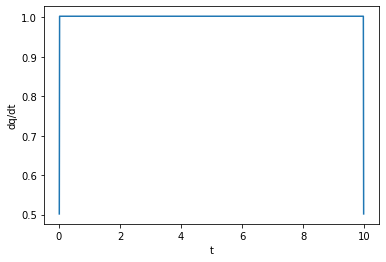

In [33]:
def dq_list(q_list: np.ndarray) -> np.ndarray:
    q_list_all = np.hstack([q_first, q_list, q_last])
    result = np.array([(q_list_all[idx+1] - q_list_all[idx-1]) / (2 * dt)
                        for idx in range(1, len(q_list_all)-1)])
    return result

print(f"len(dq_list)={len(dq_list(q_list))}")
plt.plot(t_list[1:-1], dq_list(q_list))
plt.xlabel("t")
plt.ylabel("dq/dt")
plt.show()

In [34]:
m, k = 1, 1

def action(q_list: np.ndarray) -> float:
    kinetic_energy = 0.5 * m * np.sum(dq_list(q_list)**2) * dt
    potential_energy = 0.5 * k * np.sum(q_list**2) * dt
    return kinetic_energy - potential_energy

print(f"action = {action(q_list)}")

action = -36.65422018311705


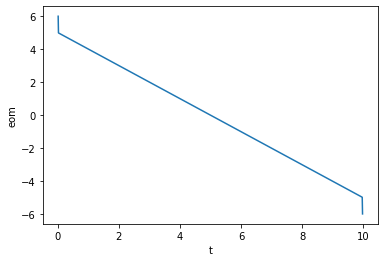

In [35]:
def ddq_list(q_list: np.ndarray) -> np.ndarray:
    q_list_all = np.hstack([q_first, q_list, q_last])
    result = np.array([(q_list_all[idx+1] - 2*q_list_all[idx] + q_list_all[idx-1]) / dt
                        for idx in range(1, len(q_list_all)-1)])
    return result

def eom(q_list: np.ndarray) -> np.ndarray:
    return m * ddq_list(q_list) - k * q_list

plt.plot(t_list[1:-1], eom(q_list))
plt.xlabel("t")
plt.ylabel("eom")
plt.show()

action=-36.70280235588538
action=-36.8354064873953
action=-37.094082668256775
action=-37.45370752888904
action=-37.806374145803694
action=-38.15612030266308
action=-38.55723770682327
action=-38.84329178326122
action=-39.012658685483544
action=-39.331340290606235
action=-39.49395573476352
action=-39.57960759911788
action=-39.65490149998495
action=-39.808373057196114
action=-40.07815389485549
action=-40.358597785649465
action=-40.84716201574708
action=-41.41763441544984
action=-42.08959002380895
action=-42.63680045761326
action=-42.97698540047512
action=-44.17520116360108
action=-45.78407241524531
action=-46.65693849982468
action=-47.241513449603524
action=-47.71332666587678
action=-48.21060741940644
action=-48.77890200802718
action=-49.07380818970342
action=-49.26222212438384
action=-49.50183763967199
action=-49.65559774597127
action=-49.82326983639297
action=-49.92860764586994
action=-50.01259630008211
action=-50.4025206021786
action=-50.6342364148252
action=-50.828997043521895
action=

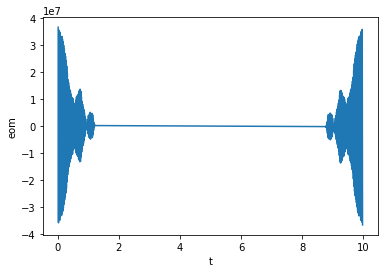

In [36]:
from scipy.optimize import minimize

def minimize_callback(xk) -> bool:
    print(f"action={action(xk)}")

res = minimize(action, q_list, method="CG", callback=minimize_callback)
plt.plot(t_list[1:-1], eom(res.x))
plt.xlabel("t")
plt.ylabel("eom")
plt.show()

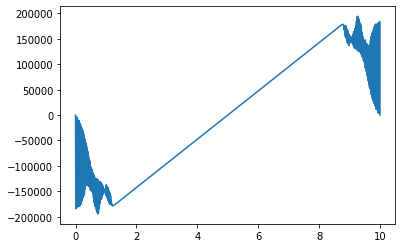

In [37]:
plt.plot(t_list, np.hstack([q_first, res.x, q_last]))